# IPL  ANALYSIS
**The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities or states in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.**

- Data is taken from https://www.kaggle.com/nowke9/ipldata
- All the analysis is based on the data (2008 to 2019)



### Importing neccessary libraries

- numpy for numerical computing.
- pandas for maniplulating data.

In [4]:

import numpy as np
import pandas as pd


- matplotlib and seaborn for visualization

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Reading the data 

In [6]:
data = pd.read_csv('matches.csv')

### Data preparation and cleaning

In [7]:
ipl_data = data[['season','city','date','team1','team2','toss_winner','toss_decision','result','winner','win_by_runs','win_by_wickets','player_of_match']]

- changing date column to date time format

In [8]:
pd.options.mode.chained_assignment = None
ipl_data['date'] = pd.to_datetime(ipl_data.date)


- filling the missing info in city column of data
- Replacing wrong spelling of team with correct one

In [9]:
ipl_data.city.fillna('Dubai',inplace = True)

In [10]:
ipl_data.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
ipl_data.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
ipl_data.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
ipl_data.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

In [11]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           756 non-null    int64         
 1   city             756 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   winner           752 non-null    object        
 9   win_by_runs      756 non-null    int64         
 10  win_by_wickets   756 non-null    int64         
 11  player_of_match  752 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 47.3+ KB


### What is total number of matches played till 2020 (2020 not included) ?

In [13]:
total = ipl_data.season.count()
print(f'The total number of matches played till 2020 is {total}')

The total number of matches played till 2020 is 756


### What are the number of matches played per season ?

- setting style to darkgrid , font size to 14 and display size to 12:6
- using matplotlib bar to plot the graph to answer the question
- .title() used to give title to the graph
- .xlabel() and .ylabel() used to set the label of x and y axis respectively

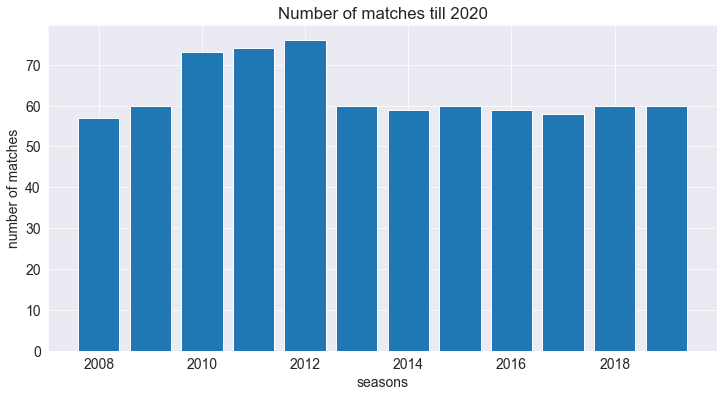

In [14]:
seasons = ipl_data.groupby('season').count()
matches = seasons.date
years = ipl_data.season.unique()
years.tolist()

sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 6)

plt.bar(years,matches)
plt.title("Number of matches till 2020")
plt.xlabel('seasons')
plt.ylabel("number of matches");

### What is the total number of wins by each team till 2020 ?

- Using seaborn .countplot() to plot the graph which count the number of repeated data in column and plot it.
- .xticks() used here to rotate the values names on x-axis

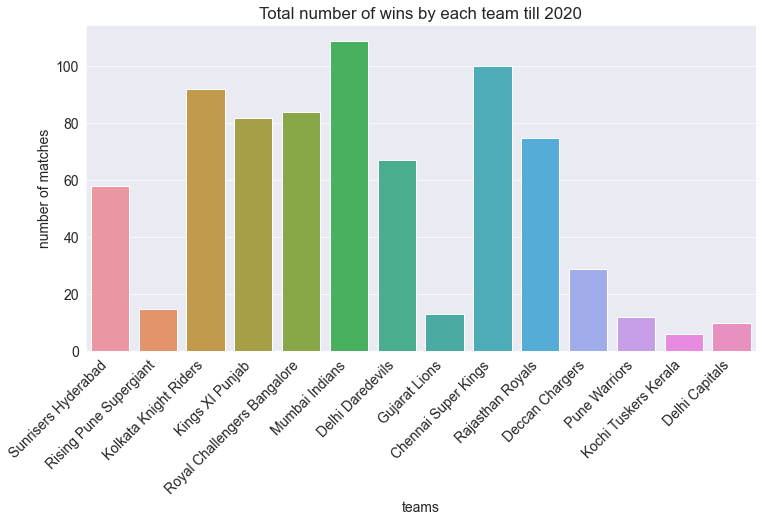

In [15]:
sns.countplot(x='winner',data = ipl_data)
plt.title("Total number of wins by each team till 2020")
plt.xlabel('teams')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("number of matches");

### What are the number of matches played in different cities?

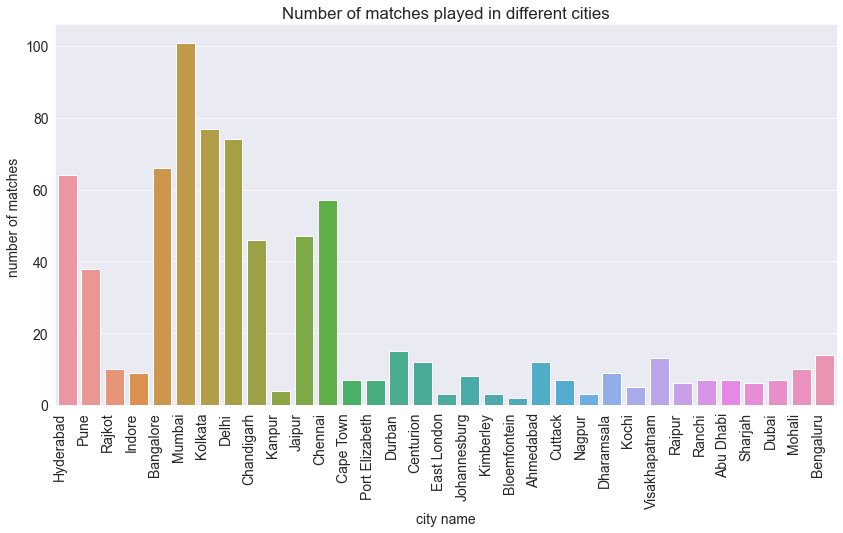

In [16]:
plt.figure(figsize=(14,7))
sns.countplot(x='city',data = ipl_data ,)
plt.title("Number of matches played in different cities")
plt.xlabel('city name')
plt.xticks(rotation = 90, ha = 'right')
plt.ylabel("number of matches ");

### Top 20 players who won the most "player of the match " title ?

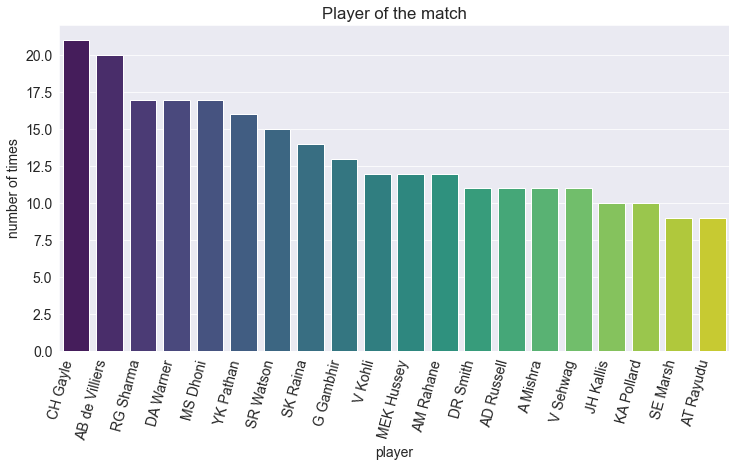

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='player_of_match',data = ipl_data,order = ipl_data['player_of_match'].value_counts().index[:20],palette='viridis')
plt.title("Player of the match")
plt.xlabel('player')
plt.xticks(rotation = 75, ha = 'right')
plt.ylabel("number of times");

### How does toss decision affect the winner of the match ??

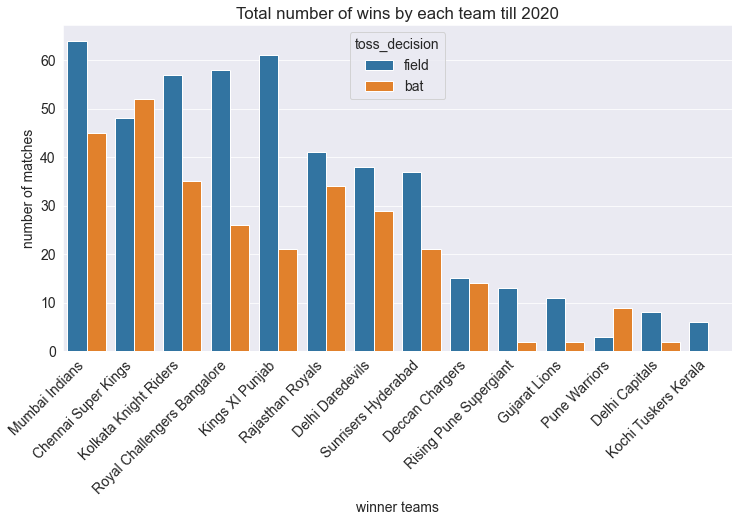

In [18]:
sns.countplot(x='winner',data = ipl_data, hue = 'toss_decision',order = ipl_data['winner'].value_counts().index)
plt.title("Total number of wins by each team till 2020")
plt.xlabel('winner teams')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("number of matches");

*From the above graph , we can conclude that chances of winning the match is higher if team choose to field .*

### What is success percentage of each teams ??

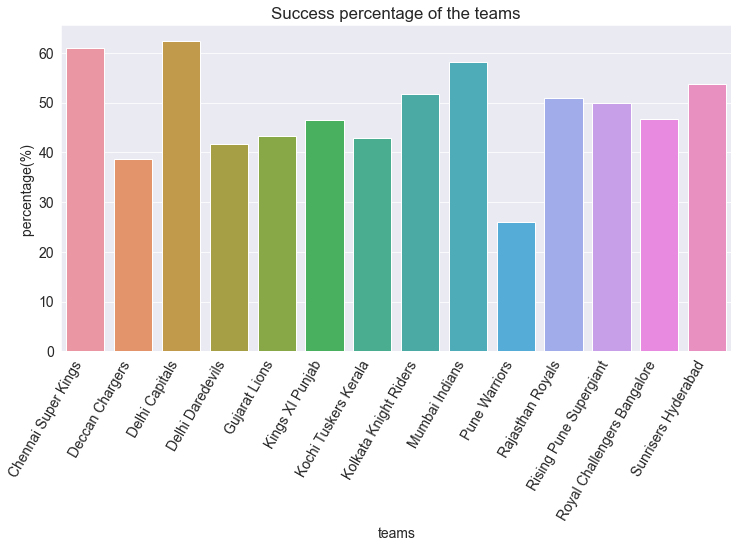

In [19]:
total_matches = ipl_data.team1.value_counts() + ipl_data.team2.value_counts()
matches_winner = ipl_data.groupby('winner')[['winner']].count()
matches_winner['total_matches'] = total_matches
success_per = round((matches_winner.winner/matches_winner.total_matches)*100,2)
matches_winner['success_per'] = success_per
matches_winner.drop(['winner'],axis = 1,inplace = True)
matches_winner.drop(['total_matches'],axis = 1,inplace = True)

plt.figure(figsize=(12,6))
sns.barplot(matches_winner.index.values,'success_per',data=matches_winner)
plt.title("Success percentage of the teams")
plt.xlabel('teams')
plt.xticks(rotation = 60, ha = 'right')
plt.ylabel("percentage(%) ");


### Which teams won the seasons till 2020 ?

<ipython-input-20-a1092a8c06ba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_winner = ipl_data.groupby('season')['season','winner'].tail(1)


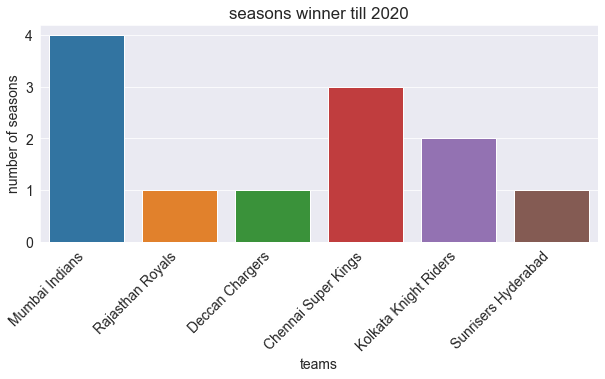

In [20]:
season_winner = ipl_data.groupby('season')['season','winner'].tail(1)
plt.figure(figsize=(10,4))
sns.countplot(x='winner',data = season_winner)
plt.title("seasons winner till 2020")
plt.xlabel('teams')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("number of seasons");

*From the graph ,we can say that Mumbai Indians won 4 times and Chennai Super Kings 3 times*

## Conclusion

#### From the above analysis, we can say :


- Most number of matches played in 2012 i.e 74
- Mumbai Indians won highest numbers of matches i.e 109 followed by Chennai Super Kings
- Matches played in Mumbai is highest among all cities
- CH Gayle won highest number of "player of the match " titles followed by AB de villiers
- Success percentage of Delhi Capitals is highest among all teams
- Most of the teams won the matches if they got fielding after toss decision
- Mumbai Indians won Ipl 4 times and Chennai Super Kings 3 times



 Made with ❤ by Ayush Kushwaha ..